<a href="https://colab.research.google.com/github/jrgreen7/SYSC4906/blob/master/Lecture_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lecture 17 - Class Imbalance


## 1. Introduction
In this notebook, we will explore four different classifiers and how they perform on artificial datasets with linear and nonlinear class distributions, as the class imbalance changes from 1:1 to 1:100. We are most interested in how the decision boundaries change between various classifiers. We will then explore under-sampling as a way to solve the issue.

<i>Note that this Notebook is based on https://scikit-learn.org/0.15/auto_examples/plot_classifier_comparison.html</i>

The classifiers we will be looking at are:
- Logistic regression
- Decision tree
- linear SVM
- SVM with a nonlinear kernel
- K-Nearest-Neighbour <i>(yes, neighbour has a 'u'...)</i>

Scikit-learn has a powerful toolboxes for building classifiers, creating artificial data, and visualizing decision boundaries. The toolboxes can be seen in the import calls below.

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification, make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import seaborn as sb

We import these packages, but as usual we will also need numpy and matplotlib. Let's import those packages now.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

## 2. The Data

Generate datasets with 1:1 class imbalance. Increase this to 1:10 and 1:100.


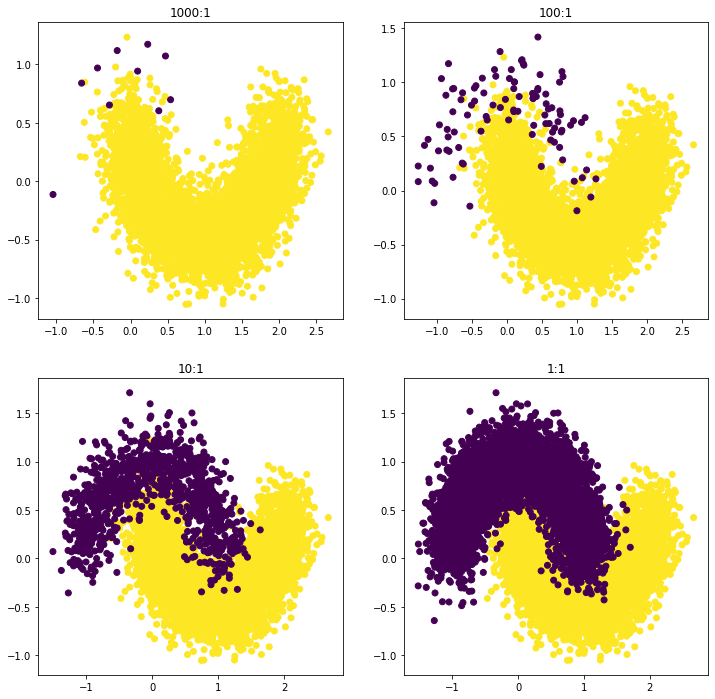

In [3]:
# Create 4 datasets of varying class imbalance:

# 1) Dataset where classes are distributed in moons
allX, ally = make_moons(noise=0.2, random_state=1, n_samples=10000)
allX_1 = allX[ally==1]
allX_0 = allX[ally==0]
ally_1 = ally[ally==1]
ally_0 = ally[ally==0]

numClass0 = 10 #1000:1
X1000 = np.concatenate((allX_1,allX_0[:numClass0,:]),axis=0) 
y1000 = np.concatenate((ally_1, ally_0[:numClass0]),axis=0)

numClass0 = 100 #100:1
X100 = np.concatenate((allX_1,allX_0[:numClass0,:]),axis=0) 
y100 = np.concatenate((ally_1, ally_0[:numClass0]),axis=0)

numClass0 = 1000 #10:1
X10 = np.concatenate((allX_1,allX_0[:numClass0,:]),axis=0) 
y10 = np.concatenate((ally_1, ally_0[:numClass0]),axis=0)

numClass0 = 10000 #1:1
X1 = np.concatenate((allX_1,allX_0[:numClass0,:]),axis=0) 
y1 = np.concatenate((ally_1, ally_0[:numClass0]),axis=0)

# Gather all four datasets
datasets = [(X1000,y1000),
            (X100,y100),
            (X10,y10),
            (X1,y1)]

dataset_names= ["1000:1", "100:1", "10:1", "1:1"]

## Visualize the datasets

#Plot 1000:1 data
plt.figure(figsize= (12,12))
plt.subplot(2, 2, 1)
plt.scatter(X1000[0:,0], X1000[0:,1], c=y1000)
plt.title(dataset_names[0])

#Plot Circles data
plt.subplot(2, 2, 2)
plt.scatter(X100[0:,0], X100[0:,1], c=y100)
plt.title(dataset_names[1])

#Plot Linearly separable
plt.subplot(2, 2, 3)
plt.scatter(X10[0:,0], X10[0:,1], c=y10)
plt.title(dataset_names[2])

#Plot Linearly separable
plt.subplot(2, 2, 4)
plt.scatter(X1[0:,0], X1[0:,1], c=y1)
plt.title(dataset_names[3]);  #(adding semi-colon suppresses output of text "Noisy Linearly Separable")

We've had a look at the data, now let's prepare our classifiers so that we can later evaluate how they perform on each dataset.

In [0]:
classifierNames = ["Logistic Regression", "Decision Tree", "Linear SVM", "RBF SVM","KNN"]

classifiers = [
    LogisticRegression(solver='lbfgs'), #Logistic regression
    DecisionTreeClassifier(max_depth=5), #Decision tree classifier with max_depth=5
    SVC(kernel="linear", C=0.025), #Linear SVM classifier
    SVC(kernel= 'rbf', gamma=2, C=1.0), # SVM with radial basis function kernel, gamma is kernel coefficient, C is penalty parameter for misclassified points
    KNeighborsClassifier(3)]

## 3. Classifier Performance

In this section, we will visualize the decision boundary for each classifier and compute the accuracy for each classifier on each dataset. We will follow the same training and testing protocol as in the CarsRegression notebook. 

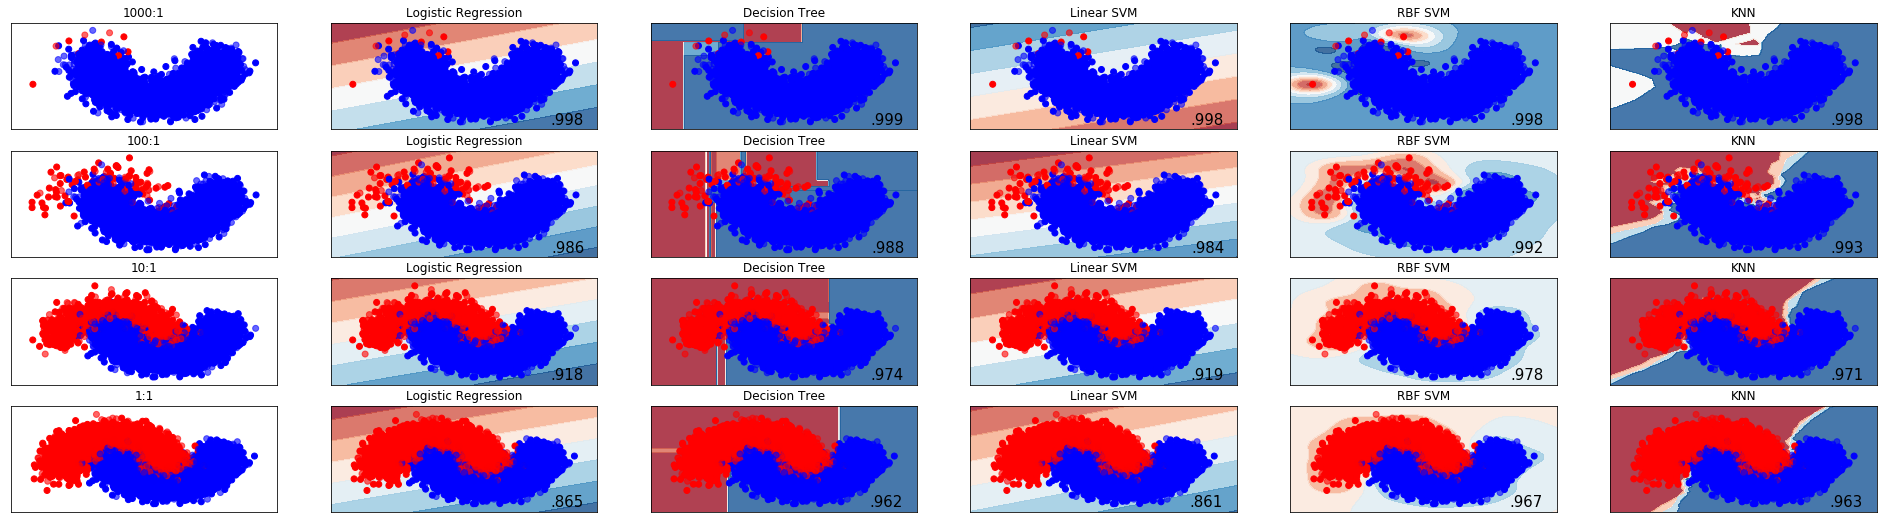

In [5]:
from sklearn.metrics import classification_report

h = .02  # Resolution in colored mesh visualizations
i= 1
figure = plt.figure(figsize=(27, 9))
j= 0


for ds in datasets:
    
    # Preprocess dataset, split into training and test part
    X, y = ds # X is feature vectors, y is class labels
    X = StandardScaler().fit_transform(X) # Standardize features by removing the mean and scaling to unit variance
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3) # handy function
    
    # Set plot axis limits
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    
    # Prepare some nice visualizations
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Plot the datasets in first column
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i, title=dataset_names[j])
    j+= 1
    # Plot the training points 
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1
    
    # Iterate over classifiers ('zip' iterates through two equal-length lists simultaneously)
    for name, clf in zip(classifierNames, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        
        # Train and test our classifier
        clf.fit(X_train, y_train) # create classification model using training data
        score = clf.score(X_test, y_test) # evaluate classifier on the testing set

        # Plot the decision boundary. For that, we will assign a color to each point in the mesh [x_min, m_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            # flatten xx and yy to 1D arrays and get decision function, or decision boundary hyperplane
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) 
        else:
            # if no decision function available, use prediction probability as contrast for contour lines
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1] 

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        
        # Plot the testing points (use alpha=0.6 to make them slightly transparent)
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6)

        # Set axes limits
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())

        # Add a title and overlay the prediction score onto the bottom-right corner of the plot
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.3f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

figure.subplots_adjust(left=.02, right=.98)
plt.show()

In [6]:
from sklearn.metrics import classification_report
j= 0

for ds in datasets:
    
    # Preprocess dataset, split into training and test part
    X, y = ds # X is feature vectors, y is class labels
    X = StandardScaler().fit_transform(X) # Standardize features by removing the mean and scaling to unit variance
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3) # handy function
    
    # Look at Logistic Regression:
    name = classifierNames[0]
    clf = classifiers[0]

    # Train and test our classifier
    clf.fit(X_train, y_train) # create classification model using training data
    i += 1

    # Accuracy on the plot is not telling the whole story. Print classification report
    y_pred = clf.predict(X_test)
    target_names = ['red', 'blue']
    print(dataset_names[j])
    print(classification_report(y_test, y_pred, target_names=target_names))
    j+=1


1000:1
              precision    recall  f1-score   support

         red       0.00      0.00      0.00         3
        blue       1.00      1.00      1.00      1500

    accuracy                           1.00      1503
   macro avg       0.50      0.50      0.50      1503
weighted avg       1.00      1.00      1.00      1503

100:1
              precision    recall  f1-score   support

         red       1.00      0.30      0.46        37
        blue       0.98      1.00      0.99      1493

    accuracy                           0.98      1530
   macro avg       0.99      0.65      0.72      1530
weighted avg       0.98      0.98      0.98      1530

10:1
              precision    recall  f1-score   support

         red       0.77      0.67      0.72       303
        blue       0.93      0.96      0.95      1497

    accuracy                           0.91      1800
   macro avg       0.85      0.81      0.83      1800
weighted avg       0.91      0.91      0.91      1800

1

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


code modified from: https://scikit-learn.org/0.15/auto_examples/plot_classifier_comparison.html

## 4. Discussion

- What did the full classification report show that the accuracy in the plots did not? 
- How would you address the class imbalance?

In [9]:
# Try subsampling from the dominant class to achieve 1:1 balance in training only

from sklearn.metrics import classification_report
j= 0

for ds in datasets:
    
    # Preprocess dataset, split into training and test part
    X, y = ds # X is feature vectors, y is class labels
    X = StandardScaler().fit_transform(X) # Standardize features by removing the mean and scaling to unit variance
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3) # handy function
    
    # Apply subsampling:
    numClass0 = len(X_train)-sum(y_train)
    print("For dataset {0:d}, numClass0={1:d}".format(j,numClass0))
    X_train_1 = X_train[y_train==1]
    X_train_0 = X_train[y_train==0]
    y_train_1 = y_train[y_train==1]
    y_train_0 = y_train[y_train==0]
    X_train_SS = np.concatenate((X_train_0,X_train_1[:numClass0,:]),axis=0) 
    y_train_SS = np.concatenate((y_train_0, y_train_1[:numClass0]),axis=0) 

    ### Really should shuffle the dataset since it is now organized by classID...

    # Look at Logistic Regression:
    name = classifierNames[0]
    clf = classifiers[0]

    # Train and test our classifier
    clf.fit(X_train_SS, y_train_SS) # create classification model using training data
    i += 1

    # Accuracy on the plot is not telling the whole story. Print classification report
    y_pred = clf.predict(X_test)
    target_names = ['red', 'blue']
    print(dataset_names[j])
    print(classification_report(y_test, y_pred, target_names=target_names))
    j+=1


For dataset 0, numClass0=5
1000:1
              precision    recall  f1-score   support

         red       0.02      1.00      0.03         5
        blue       1.00      0.81      0.89      1498

    accuracy                           0.81      1503
   macro avg       0.51      0.90      0.46      1503
weighted avg       1.00      0.81      0.89      1503

For dataset 1, numClass0=66
100:1
              precision    recall  f1-score   support

         red       0.17      0.74      0.27        34
        blue       0.99      0.92      0.95      1496

    accuracy                           0.91      1530
   macro avg       0.58      0.83      0.61      1530
weighted avg       0.98      0.91      0.94      1530

For dataset 2, numClass0=704
10:1
              precision    recall  f1-score   support

         red       0.55      0.86      0.67       296
        blue       0.97      0.86      0.91      1504

    accuracy                           0.86      1800
   macro avg       0.76   